
# SIP Lab 3 : Discrete cosine transform, Introduction to JPEG.

### Basile Mouret, Malik Hacini

## Exercice 1


### Question 1

### Question 2

When $k \neq p$ :
$$
\begin{align}
\langle e_k, e_p \rangle &= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{k \pi}L(n+\frac 12))cos(\frac{p \pi}L(n+\frac 12))\\
&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{(k+p) \pi}L(n+\frac 12))+cos(\frac{(k-p) \pi}L(n+\frac 12))\\

&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}L(n+\frac 12))})+\Re(e^{i(\frac{(k-p) \pi}L(n+\frac 12))})\\

&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k+p) \pi}Ln)} + e^{i(\frac{(k-p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k-p) \pi}Ln)})\\
&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})} \frac{1-e^{i((k+p)\pi}}{1-e^{\frac{i(k+p)\pi}L}}+e^{i(\frac{(k-p) \pi}{2L})} \frac{1-e^{i((k-p)\pi}}{1-e^{\frac{i(k-p)\pi}L}})\\
\end{align}
$$
We have $ \frac{e^{i\frac x2}}{1-e^{ix}} = \frac 1{e^{-i\frac x 2}+e^{i\frac x 2}} = i\frac 2{sin(\frac x 2)}$
$$
\langle e_k, e_p \rangle = \frac{2\lambda_k\lambda_p}{L} \Re(i(\frac {1-e^{i((k+p)\pi}}{sin(\frac{(k+p) \pi}{2L})}+\frac {1-e^{i((k-p)\pi}}{sin(\frac{(k-p) \pi}{2L})}))\\
$$

When $k+p$ is even, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=0$,
so $ \langle e_k, e_p \rangle = 0 $

When $k+p$ is odd, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=2$ and $i(\frac {2}{sin(\frac{(k+p) \pi}{2L})}+\frac {2}{sin(\frac{(k-p) \pi}{2L})})$ is imaginary,
so $ \langle e_k, e_p \rangle = 0 $

### Question 3

### Question 4

### Question 5

## Exercice 2

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

### Question 1


(256, 256)


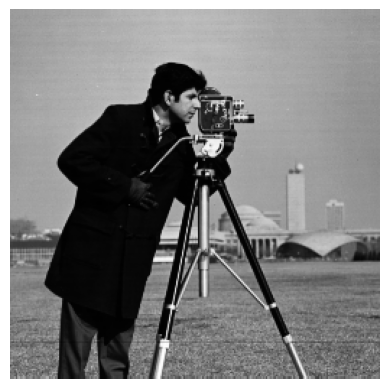

In [182]:
img = plt.imread("cameraman.png")
print(img.shape)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [183]:
blocks = np.empty((32,32), dtype=object)
for i in range(32):
    for j in range(32):
        blocks[i,j] = img[8*i:8*(i+1),8*j:8*(j+1)]
        # apply the dct on the rows
        for r in range(8):
            blocks[i,j][r,:] = dct(blocks[i,j][r,:])
        # apply the dct on the columns
        for c in range(8):
            blocks[i,j][:,c] = dct(blocks[i,j][:,c])

### Question 2

The coefficients represent the frequency components in 2D, increasing from left to right and top to bottom. \
So for example, the $(4,3)$ coefficient represents the component of frequency $4$ in the $y$ direction and $3$ in the $x$ direction.\
The top left coefficient represents the average brightness of the block.

### Question 3

In [184]:
# Quantization Matrix
def get_Q(q):
    Q = np.zeros((8,8)) 
    for i in range(8):
        for j in range(8):
            Q[i,j] = 1+q*(1+i+j)
    return Q

Q5 = get_Q(5)
print("Q5 = \n",Q5)

quantized_blocks = np.empty((32,32), dtype=object)
for i in range(blocks.shape[0]):
    for j in range(blocks.shape[1]):
        quantized_blocks[i,j] = np.round(blocks[i,j]/Q5)

Q5 = 
 [[ 6. 11. 16. 21. 26. 31. 36. 41.]
 [11. 16. 21. 26. 31. 36. 41. 46.]
 [16. 21. 26. 31. 36. 41. 46. 51.]
 [21. 26. 31. 36. 41. 46. 51. 56.]
 [26. 31. 36. 41. 46. 51. 56. 61.]
 [31. 36. 41. 46. 51. 56. 61. 66.]
 [36. 41. 46. 51. 56. 61. 66. 71.]
 [41. 46. 51. 56. 61. 66. 71. 76.]]


### Question 4

In [185]:
def compute_non_zero_prop(q):
    non_zero=0
    Q = get_Q(q)
    quantized_blocks = np.empty((32,32), dtype=object)
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            quantized_blocks[i,j] = np.round(blocks[i,j]/Q)
            non_zero+=sum([(quantized_blocks[i,j][x,y]!=0)for x in range(8) for y in range(8)])
    print("q = ",q, " : ", round(non_zero/(256*256) * 100,2), "% of non zero coefficients", sep="")
            
for q in range(10):
    compute_non_zero_prop(q) 

q = 0 : 26.59% of non zero coefficients
q = 1 : 6.11% of non zero coefficients
q = 2 : 4.12% of non zero coefficients
q = 3 : 3.32% of non zero coefficients
q = 4 : 2.88% of non zero coefficients
q = 5 : 2.62% of non zero coefficients
q = 6 : 2.44% of non zero coefficients
q = 7 : 2.31% of non zero coefficients
q = 8 : 2.2% of non zero coefficients
q = 9 : 2.11% of non zero coefficients


### Question 5

Having a long sequence of zero is usefull for saving storage.
 Instead of saving each zero in 1 byte, we can just specify the number of zeros and then a zero.\
This technique is called run lenght encoding and saves a lot of space when the encoding has a lot of repeating values next to one another. 